In [15]:
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from matplotlib import pyplot as plt

StatementMeta(fixmespark, 31, 16, Finished, Available)

In [16]:
## Reading Data
df = spark.read.load('abfss://fixme@fixmeadlsstorage.dfs.core.windows.net/covid_data.csv', format='csv',header='true')

StatementMeta(fixmespark, 31, 17, Finished, Available)

In [17]:
df.describe().toPandas()

StatementMeta(fixmespark, 31, 18, Finished, Available)

,summary,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,count,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
1,mean,543.0,None,None,None,49.483689205219456,None,None,0.17695852534562212,0.14431082331174838,0.05806451612903226,0.14654377880184333,None,None,None,None,None,None
2,stddev,313.3568253604826,None,None,None,18.255334307343926,None,None,0.38180959099585343,0.3515672734255259,0.23397325257110071,0.353813618626474,None,None,None,None,None,None
3,min,1,Afghanistan,Afghanistan,NA,0.25,1/10/2020,1/1/2020,0,0,0,0,NA,abdominal pain,breathlessness,cough,cough,diarrhea
4,max,999,Zhuhai,Vietnam,male,NA,NA,NA,1,NA,1,1,vomiting,NA,NA,NA,NA,NA


In [18]:
string_indexer = StringIndexer(inputCols=['location','country', 'gender', 'symptom1', 'symptom2', 'symptom3', 'symptom4','symptom5','symptom6'], 
outputCols=['location_indexed','country_indexed', 'gender_indexed', 'symptom1_indexed', 'symptom2_indexed', 'symptom3_indexed', 'symptom4_indexed','symptom5_indexed','symptom6_indexed'])
df = string_indexer.fit(df).transform(df)
df.columns

StatementMeta(fixmespark, 31, 19, Finished, Available)

['id',
 'location',
 'country',
 'gender',
 'age',
 'sym_on',
 'hosp_vis',
 'vis_wuhan',
 'from_wuhan',
 'death',
 'recov',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'symptom6',
 'location_indexed',
 'country_indexed',
 'gender_indexed',
 'symptom1_indexed',
 'symptom2_indexed',
 'symptom3_indexed',
 'symptom4_indexed',
 'symptom5_indexed',
 'symptom6_indexed']

In [19]:
diff_sym_hos = unix_timestamp(col("hosp_vis"),"M/d/yyyy")-unix_timestamp(col("sym_on"),"M/d/yyyy")
df = df.withColumn('diff_sym_hos', diff_sym_hos)

StatementMeta(fixmespark, 31, 20, Finished, Available)

In [20]:
df.printSchema()

StatementMeta(fixmespark, 31, 21, Finished, Available)

root
 |-- id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sym_on: string (nullable = true)
 |-- hosp_vis: string (nullable = true)
 |-- vis_wuhan: string (nullable = true)
 |-- from_wuhan: string (nullable = true)
 |-- death: string (nullable = true)
 |-- recov: string (nullable = true)
 |-- symptom1: string (nullable = true)
 |-- symptom2: string (nullable = true)
 |-- symptom3: string (nullable = true)
 |-- symptom4: string (nullable = true)
 |-- symptom5: string (nullable = true)
 |-- symptom6: string (nullable = true)
 |-- location_indexed: double (nullable = false)
 |-- country_indexed: double (nullable = false)
 |-- gender_indexed: double (nullable = false)
 |-- symptom1_indexed: double (nullable = false)
 |-- symptom2_indexed: double (nullable = false)
 |-- symptom3_indexed: double (nullable = false)
 |-- symptom4_indexed: double (nullable = f

In [21]:
df = df.withColumn("age", col("age").cast("Integer"))
df = df.withColumn("vis_wuhan", col("vis_wuhan").cast("Integer"))
df = df.withColumn("from_wuhan", col("from_wuhan").cast("Integer"))
df = df.withColumn("death", col("death").cast("Integer"))
df = df.fillna(value=50, subset=['age'])
df.printSchema()

StatementMeta(fixmespark, 31, 22, Finished, Available)

root
 |-- id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- sym_on: string (nullable = true)
 |-- hosp_vis: string (nullable = true)
 |-- vis_wuhan: integer (nullable = true)
 |-- from_wuhan: integer (nullable = true)
 |-- death: integer (nullable = true)
 |-- recov: string (nullable = true)
 |-- symptom1: string (nullable = true)
 |-- symptom2: string (nullable = true)
 |-- symptom3: string (nullable = true)
 |-- symptom4: string (nullable = true)
 |-- symptom5: string (nullable = true)
 |-- symptom6: string (nullable = true)
 |-- location_indexed: double (nullable = false)
 |-- country_indexed: double (nullable = false)
 |-- gender_indexed: double (nullable = false)
 |-- symptom1_indexed: double (nullable = false)
 |-- symptom2_indexed: double (nullable = false)
 |-- symptom3_indexed: double (nullable = false)
 |-- symptom4_indexed: double (nullable

In [22]:
df = df.fillna(np.nan)
df.limit(10)

StatementMeta(fixmespark, 31, 23, Finished, Available)

DataFrame[id: string, location: string, country: string, gender: string, age: int, sym_on: string, hosp_vis: string, vis_wuhan: int, from_wuhan: int, death: int, recov: string, symptom1: string, symptom2: string, symptom3: string, symptom4: string, symptom5: string, symptom6: string, location_indexed: double, country_indexed: double, gender_indexed: double, symptom1_indexed: double, symptom2_indexed: double, symptom3_indexed: double, symptom4_indexed: double, symptom5_indexed: double, symptom6_indexed: double, diff_sym_hos: bigint]

In [23]:
df = df.drop('id', 'location', 'gender', 'country', 'sym_on', 'hosp_vis', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6')

StatementMeta(fixmespark, 31, 24, Finished, Available)

In [24]:
input_features = ['location_indexed','country_indexed','gender_indexed','age','vis_wuhan','from_wuhan','symptom1_indexed','symptom2_indexed','symptom3_indexed','symptom4_indexed','symptom5_indexed','symptom6_indexed','diff_sym_hos']


StatementMeta(fixmespark, 31, 25, Finished, Available)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics

StatementMeta(fixmespark, 31, 27, Finished, Available)

In [25]:
df = df.toPandas()
input_cols = df[input_features]
label = df.death
X_train, X_test, y_train, y_test = train_test_split(input_cols, label, test_size=0.2, random_state=10)
#train_data,test_data = transformed_data.randomSplit([0.8,0.2])
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)


StatementMeta(fixmespark, 31, 26, Finished, Available)

StatementMeta(fixmespark, 31, 14, Finished, Available)

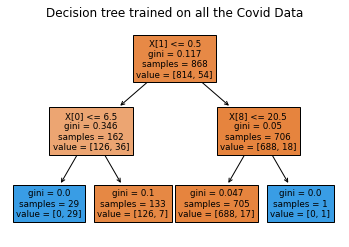

In [13]:
plot_tree(dt, filled=True)
plt.title("Decision tree trained on all the Covid Data")
plt.show()
# plt.savefig() GIVE THE PATH

In [27]:
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

StatementMeta(fixmespark, 31, 28, Finished, Available)

Accuracy: 0.9631336405529954
Precision: 0.6
Recall: 0.3333333333333333
F1: 0.42857142857142855


StatementMeta(fixmespark, 31, 30, Finished, Available)

Text(0.5, 1.0, 'Evaluation Metrics for Decision Tree')

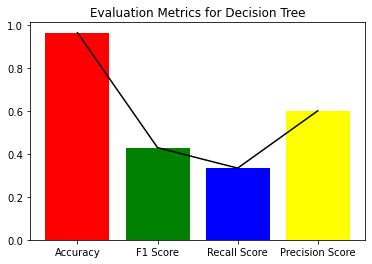

In [29]:
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy,f1,recall,precision],color=['red','green','blue','yellow'])
plt.plot([accuracy,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Decision Tree')

In [14]:
dt_preds = dt_model.transform(test_data)
accuracy_eval = MulticlassClassificationEvaluator(predictionCol='prediction',metricName='accuracy', labelCol='death')
precision_eval = MulticlassClassificationEvaluator(predictionCol='prediction',metricName='weightedPrecision', labelCol='death')
recall_eval = MulticlassClassificationEvaluator(predictionCol='prediction',metricName='weightedRecall', labelCol='death')
f1_eval = MulticlassClassificationEvaluator(predictionCol='prediction',metricName='f1', labelCol='death')
accuracy = accuracy_eval.evaluate(dt_preds)
precision = precision_eval.evaluate(dt_preds)
recall = recall_eval.evaluate(dt_preds)
f1 = f1_eval.evaluate(dt_preds)
print('accuracy:')
print(accuracy)
print('precision:')
print(precision)
print('recall:')
print(recall)
print('f1:')
print(f1)

StatementMeta(fixmespark, 31, 15, Finished, Available)

NameError: name 'dt_model' is not defined